## **Задание 1 - Генератор случайных матриц**

In [113]:
# Реализую произвольную m,n, верхнетреугольную и симметричную. Остальное на вас - вам нужно дописать функцию.
# Не забудьте откомментировать ваши изменения в документации к функции!

import numpy as np

def matrix_generate(rows, columns, type_ = "full", eps = 0, m = 0):
    
    """
    matrix_generate(rows, columns, type_ = "full")

    Создаёт случайную матрицу выбранного типа.

    Если матрицу нужных размеров создать нельзя должен выдать
    строку f"Error with type {type_} and shape ({rows},{columns})".

    Parameters
    ----------

    rows : int
        Количество строк в создаваемой матрице.
    columns : int
        Количество столбцов в создаваемой матрице.
    type_ : str, optional
        Тип создаваемой матрицы: "full", "diagonal", "upper_triangular", "lower_triangular", "symmetric", "singular",  "reduced row echelon", "perturbation"
    eps: float, optional
        Дополнительное число, использующееся при генерации для некоторых типов матриц.
    m: int, optional
        Ранг матрицы ступенчатого вида.

    Returns
    -------
    out : ndarray or str
        Выдаёт матрицу нужного типа либо ошибку.

    Notes
    -----
    Поддерживаемые типы матриц:
        "full","diagonal", "upper_triangular",
        "lower_triangular", "symmetric", "singular",
        "reduced row echelon", "perturbation"
        


    """

    A = None

    if type_ == "full":
        A = np.random.random(size=(rows, columns))

    elif type_ == "diagonal":
        
        if rows != columns:
            return f"Error with type {type_} and shape ({rows},{columns})"
        else:
            A = np.diag(np.random.random(size = rows))

    elif type_ == "upper_triangular":

        A = np.random.random(size=(rows, columns))

        for i in range(rows):
            for j in range(columns):
                if (i > j):
                    A[i, j] = 0

    # Для нижнетреугольной подумайте, как сделать без циклов for :) (звёздочка)
    elif type_ == "lower_triangular":

        A = np.random.random(size=(rows, columns))
        A = np.tril(A) # np.triu(A) - если переделывать уже готовую "upper_triangular"

    elif type_ == "symmetric":

        if rows != columns:
            return f"Error with type {type_} and shape ({rows},{columns})"

        else:

            A = np.random.random(size=(rows, columns))

            # И эту секцую тоже перепишите без for (звёздочка). Учтите, что портить uniform распределение нельзя.

            A = np.tril(A) + np.tril(A, k = -1).T

    elif type_ == "singular":
        if rows != columns:
            return f"Error with type {type_} and shape ({rows},{columns})"
        else:
            A = np.random.random(size=(rows-1, columns))
            A = np.concatenate((A, np.zeros((1,columns))), axis=0)

    elif type_ == "reduced row echelon": 

        if (rows != columns) or (m > rows) or (m > columns):
            return f"Error with type {type_}, shape ({rows},{columns}) and rank {m}"

        A = np.concatenate((np.eye(m), np.random.random(size=(m, columns - m))), axis=1)
        A = np.concatenate((A, np.zeros(shape=(rows - m, columns))), axis=0)

    elif type_ == "perturbation":
        A = np.random.uniform(-eps, eps, size=(rows, columns))

    return A

Проверка работоспособности функции:

In [114]:
matrix_generate(3,3)

array([[0.3253997 , 0.74649141, 0.6496329 ],
       [0.84922341, 0.65761289, 0.5683086 ],
       [0.09367477, 0.3677158 , 0.26520237]])

In [115]:
matrix_generate(4,4, "diagonal")

array([[0.24398964, 0.        , 0.        , 0.        ],
       [0.        , 0.97301055, 0.        , 0.        ],
       [0.        , 0.        , 0.39309772, 0.        ],
       [0.        , 0.        , 0.        , 0.89204656]])

In [116]:
matrix_generate(4,3, "upper_triangular")

array([[0.63113863, 0.7948113 , 0.50263709],
       [0.        , 0.49251769, 0.19524299],
       [0.        , 0.        , 0.02431597],
       [0.        , 0.        , 0.        ]])

In [117]:
matrix_generate(4,3, "lower_triangular")

array([[0.95392858, 0.        , 0.        ],
       [0.01545662, 0.92831856, 0.        ],
       [0.96665482, 0.96361998, 0.85300946],
       [0.29444889, 0.38509773, 0.85113667]])

In [118]:
matrix_generate(4,4, "symmetric")

array([[0.31692201, 0.6960298 , 0.99005385, 0.74076862],
       [0.6960298 , 0.57006117, 0.14008402, 0.69701574],
       [0.99005385, 0.14008402, 0.51832965, 0.70248408],
       [0.74076862, 0.69701574, 0.70248408, 0.35949115]])

In [119]:
matrix_generate(4,4, "singular")

array([[0.29359184, 0.80936116, 0.81011339, 0.86707232],
       [0.91324055, 0.5113424 , 0.50151629, 0.79829518],
       [0.64996393, 0.70196688, 0.79579267, 0.89000534],
       [0.        , 0.        , 0.        , 0.        ]])

In [120]:
matrix_generate(5,5, "reduced row echelon", m = 3)

array([[1.        , 0.        , 0.        , 0.33799516, 0.37558295],
       [0.        , 1.        , 0.        , 0.09398194, 0.57828014],
       [0.        , 0.        , 1.        , 0.03594227, 0.46559802],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ]])

In [121]:
matrix_generate(4,4, "perturbation", eps=1)

array([[ 0.08528927, -0.4269175 ,  0.18166652, -0.9389995 ],
       [-0.92530362,  0.64520112, -0.27961872, -0.74587897],
       [ 0.04448652,  0.53998711, -0.56835795,  0.24578095],
       [-0.82930507, -0.89663656,  0.06270926,  0.08127024]])

Оценим численно вероятность того, что созданная матрица будет вырожденной для какого-либо случая выше:

Возьмём, например, случай *singular*. Тогда вероятность вырожденности созданной матрицы равна 1 **:)**

In [122]:
singular = True

for i in range(1000000):
    a = matrix_generate(4,4, "singular")
    if np.linalg.det(a) != 0:
        singular = False
        break

if singular:
    print("All matrixes are singular :)")
else:
    print("Impossible!!!")

All matrixes are singular :)


## **Задание 2 - Вычисление матричных норм и числа обусловленности**

Реализация векторных норм:

In [123]:
# Вообще, в условии не запрещено использовать встроенную np.linalg.norm(),
# которая умеет считать все эти (как векторные, так и матричные) нормы,
# но если писать самому, то:

def L1_vec(x):
    return np.sum(np.abs(x)),

def L2_vec(x):
    return np.sqrt(np.sum(x**2))

def Max_vec(x):
    return np.max(np.abs(x))

Реализация матричных норм:

In [124]:
def L1_mat(A):
    return np.max(np.sum(np.abs(A), axis=0))

def L2_mat(A):
    return np.sqrt(np.max(np.linalg.eigvals(A.T @ A)))

def Max_mat(A):
    return np.max(np.sum(np.abs(A), axis=1))

Число обусловленности

In [125]:
# Опять же, есть уже готовая np.linalg.cond(), но если писать самому, то:

def cond(A, norm="L2"):
    if norm == "L1":
        return L1_mat(A) * L1_mat(np.linalg.inv(A))
    elif norm == "L2":
        return L2_mat(A) * L2_mat(np.linalg.inv(A))
    elif norm == "inf":
        return Max_mat(A) * Max_mat(np.linalg.inv(A))

## **Задание 3 - Эквивалентность первых двух норм**

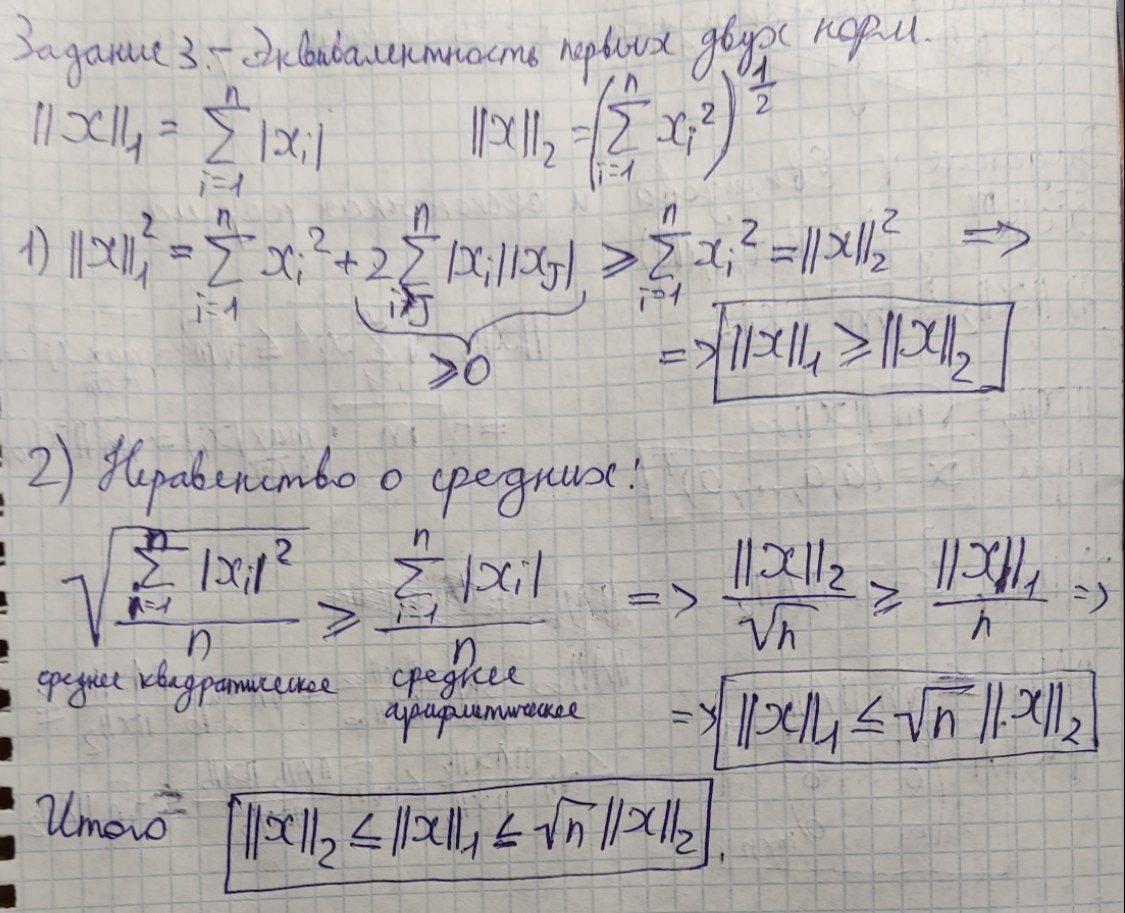

## **Задание 4 - Евклидова и бесконечная норма**

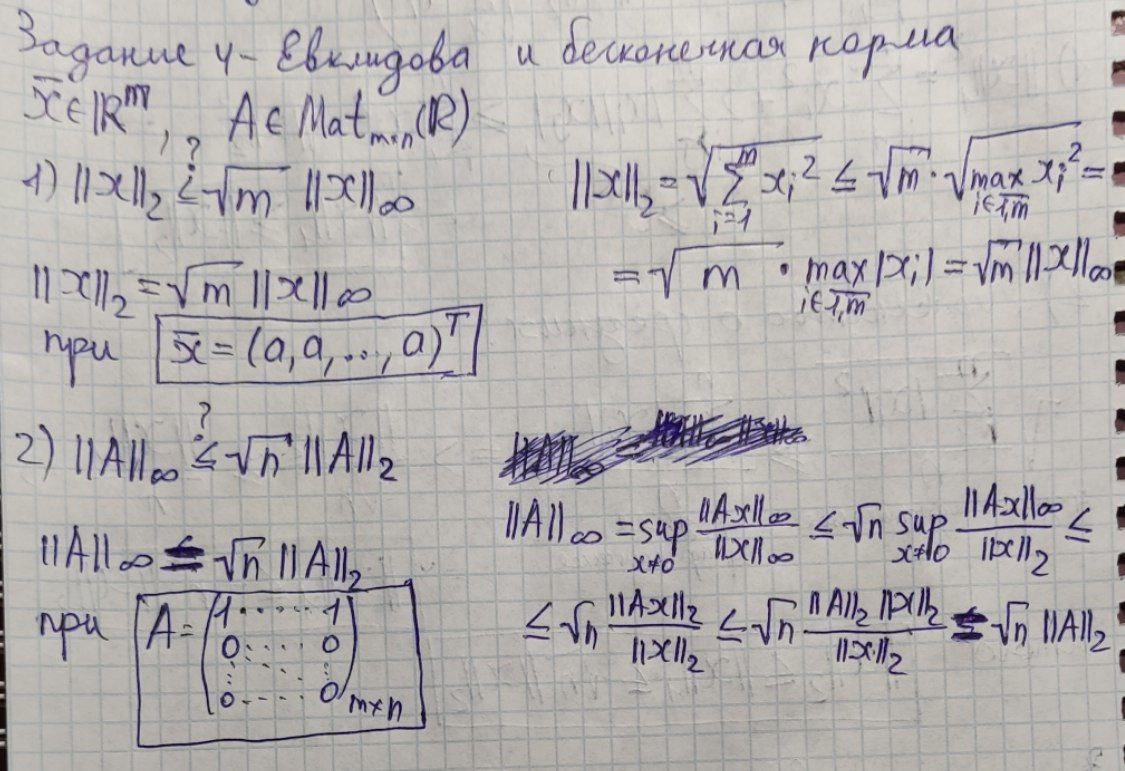

## **Задание 5 - Норма Фробениуса**

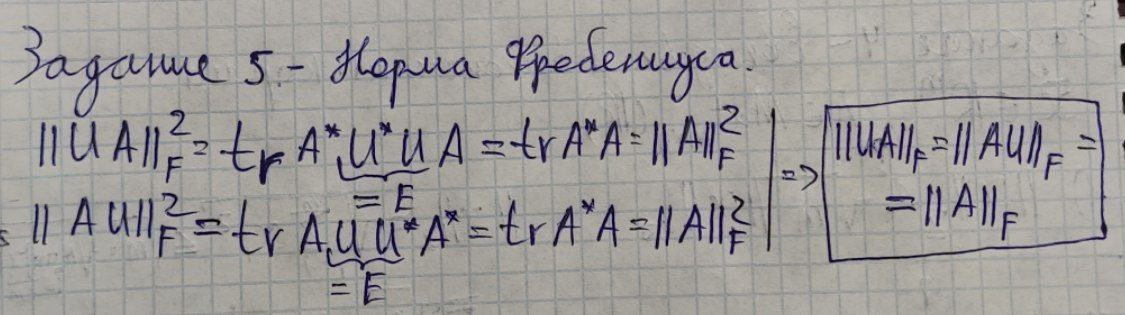

## **Задание 6 - Тензорная свёртка**

Создаём тензоры

In [126]:
import itertools

In [127]:
c = 3

In [128]:
# Generate some data
np.random.seed(42)
lambda1 = np.random.normal(size=(c, c))
lambda2 = np.random.normal(size=(c, c))
lambda3 = np.random.normal(size=(c, c))
G1 = np.random.normal(size=(c, c, c))
G2 = np.random.normal(size=(c, c, c))
U = np.random.normal(size=(c, c, c, c))

Реализация 1 (convolutions.ipynb)

In [129]:
def Z_naive(lambda1, lambda2, lambda3, G1, G2, U):
    c = lambda1.shape[0]
    Z = np.zeros(shape=(c, c, c, c))
    for a, b, c, d, e, f, g, h, i, j in itertools.product(*([range(c)]*10)):
        Z[a, h, i, j] += lambda1[a, b]*lambda2[d, e]*lambda3[g, h]*G1[c, b, d]*G2[f, e, g]*U[i, j, c, f]
    return Z

In [130]:
%%timeit
Z = Z_naive(lambda1, lambda2, lambda3, G1, G2, U)

60.4 ms ± 5.84 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [131]:
Z = Z_naive(lambda1, lambda2, lambda3, G1, G2, U)
Z.shape

(3, 3, 3, 3)

Реализация 2 ( einsum(optimize=False) )

In [132]:
def eins(lambda1, lambda2, lambda3, G1, G2, U):
    return np.einsum("ab,cbd,de,feg,gh,ijcf->ahij", lambda1, G1, lambda2, G2, lambda3, U, optimize=False)

In [133]:
%%timeit
Z = eins(lambda1, lambda2, lambda3, G1, G2, U)

1.21 ms ± 48.2 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [134]:
Z = eins(lambda1, lambda2, lambda3, G1, G2, U)
Z.shape

(3, 3, 3, 3)

Реализация 3 ( einsum(optimize="optimal") )

In [135]:
def eins_opt(lambda1, lambda2, lambda3, G1, G2, U):
    return np.einsum("ab,cbd,de,feg,gh,ijcf->ahij", lambda1, G1, lambda2, G2, lambda3, U, optimize="optimal")

In [136]:
%%timeit
Z = eins_opt(lambda1, lambda2, lambda3, G1, G2, U)

924 μs ± 26.3 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [137]:
Z = eins_opt(lambda1, lambda2, lambda3, G1, G2, U)
Z.shape

(3, 3, 3, 3)

Реализация 4 ( einsum(optimize="greedy") что эквивалентно einsum(optimize=True))

In [138]:
def eins_grd(lambda1, lambda2, lambda3, G1, G2, U):
    return np.einsum("ab,cbd,de,feg,gh,ijcf->ahij", lambda1, G1, lambda2, G2, lambda3, U, optimize="greedy")

In [139]:
%%timeit
Z = eins_grd(lambda1, lambda2, lambda3, G1, G2, U)

190 μs ± 3.55 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [140]:
Z = eins_grd(lambda1, lambda2, lambda3, G1, G2, U)
Z.shape

(3, 3, 3, 3)

Реализация 5 ( с помощью einsum_path)

In [141]:
path = np.einsum_path("ab,cbd,de,feg,gh,ijcf->ahij", lambda1, G1, lambda2, G2, lambda3, U, optimize="optimal")

In [142]:
print(path[0])

['einsum_path', (0, 1), (0, 1), (0, 3), (1, 2), (0, 1)]


In [143]:
print(path[1])

  Complete contraction:  ab,cbd,de,feg,gh,ijcf->ahij
         Naive scaling:  10
     Optimized scaling:  6
      Naive FLOP count:  3.543e+05
  Optimized FLOP count:  2.431e+03
   Theoretical speedup:  145.740
  Largest intermediate:  8.100e+01 elements
--------------------------------------------------------------------------
scaling                  current                                remaining
--------------------------------------------------------------------------
   4                 cbd,ab->acd                 de,feg,gh,ijcf,acd->ahij
   4                 feg,de->dfg                    gh,ijcf,acd,dfg->ahij
   4                 dfg,gh->dfh                       ijcf,acd,dfh->ahij
   5               dfh,acd->acfh                          ijcf,acfh->ahij
   6             acfh,ijcf->ahij                               ahij->ahij


Видим, что при прямолинейной реализации число операций (Naive scaling) равно $\chi^{10}$

В то время как для оптимизированной реализации число операций (scaling) равно $3 \chi^{4}+\chi^{5}+\chi^{6}=1.13\chi^{6} \approx\chi^{6}$

То есть примерно на 4 порядка меньше операций.

In [144]:
def eins_w_path(lambda1, lambda2, lambda3, G1, G2, U):
    return np.einsum("ab,cbd,de,feg,gh,ijcf->ahij", lambda1, G1, lambda2, G2, lambda3, U, optimize=path[0])

In [145]:
%%timeit
Z = eins_w_path(lambda1, lambda2, lambda3, G1, G2, U)

132 μs ± 3.23 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [146]:
Z = eins_w_path(lambda1, lambda2, lambda3, G1, G2, U)
Z.shape

(3, 3, 3, 3)

Реализация 6 (dot и tensordot на основе пути из einsum_path)

In [158]:
def elementary_funcs(lambda1, lambda2, lambda3, G1, G2, U):
    step_1 = np.dot(lambda1, G1)
    step_2 = np.dot(lambda2, G2)
    step_3 = np.dot(step_2, lambda3)
    step_4 = np.tensordot(step_1, step_3, axes=([2],[0]))

    return np.tensordot(step_4, U, axes=([1,2],[2,3]))

In [159]:
%%timeit
Z_elem = elementary_funcs(lambda1, lambda2, lambda3, G1, G2, U)

20 μs ± 122 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


**Более чем в 6 раз быстрее чем в предыдущей реализации !**

In [160]:
Z_elem = elementary_funcs(lambda1, lambda2, lambda3, G1, G2, U)
Z_elem.shape

(3, 3, 3, 3)

Проверим правильность подсчётов:

In [161]:
(Z_elem != Z).sum()

0